In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [6]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [8]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [9]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
df.describe()


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
final_dataset=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']]

In [13]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
final_dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [15]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [17]:
final_dataset=final_dataset.rename(columns={'owner_Fourth & Above Owner':'owner_forth','owner_Third Owner':'owner_third','owner_Second Owner':'owner_second','owner_Test Drive Car':'owner_first'})

In [20]:
final_dataset=final_dataset.drop(['seller_type_Trustmark Dealer'],axis=1)

In [21]:
final_dataset.columns

Index(['year', 'selling_price', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'transmission_Manual', 'owner_forth', 'owner_second', 'owner_first',
       'owner_third'],
      dtype='object')

In [22]:
final_dataset.corr()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_forth,owner_second,owner_first,owner_third
year,1.000000,0.413922,-0.419688,0.121424,-0.025540,-0.051266,-0.114908,-0.173703,-0.143800,-0.186361,-0.292349,0.095795,-0.244308
selling_price,0.413922,1.000000,-0.192289,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.419688,-0.192289,1.000000,0.285396,-0.001372,0.036652,-0.291139,0.182663,0.120226,0.097349,0.195203,-0.083445,0.194713
fuel_Diesel,0.121424,0.282947,0.285396,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.025540,-0.005095,-0.001372,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.051266,-0.042434,0.036652,-0.072422,-0.001108,1.000000,-0.071427,0.035122,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.114908,-0.269453,-0.291139,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.173703,-0.236798,0.182663,-0.035314,-0.026118,0.035122,0.029845,1.000000,0.214163,0.072322,0.186573,-0.107886,0.140823
transmission_Manual,-0.143800,-0.530205,0.120226,-0.048098,-0.044746,0.024764,0.039614,0.214163,1.000000,0.035597,0.068068,0.009152,0.030802
owner_forth,-0.186361,-0.078725,0.097349,-0.021054,-0.002094,0.013384,0.011502,0.072322,0.035597,1.000000,-0.080648,-0.008648,-0.037849


In [23]:
final_dataset.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_forth,owner_second,owner_first,owner_third
0,2007,60000,70000,0,0,0,1,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,1,0,1,0,0


In [24]:
import seaborn as sns

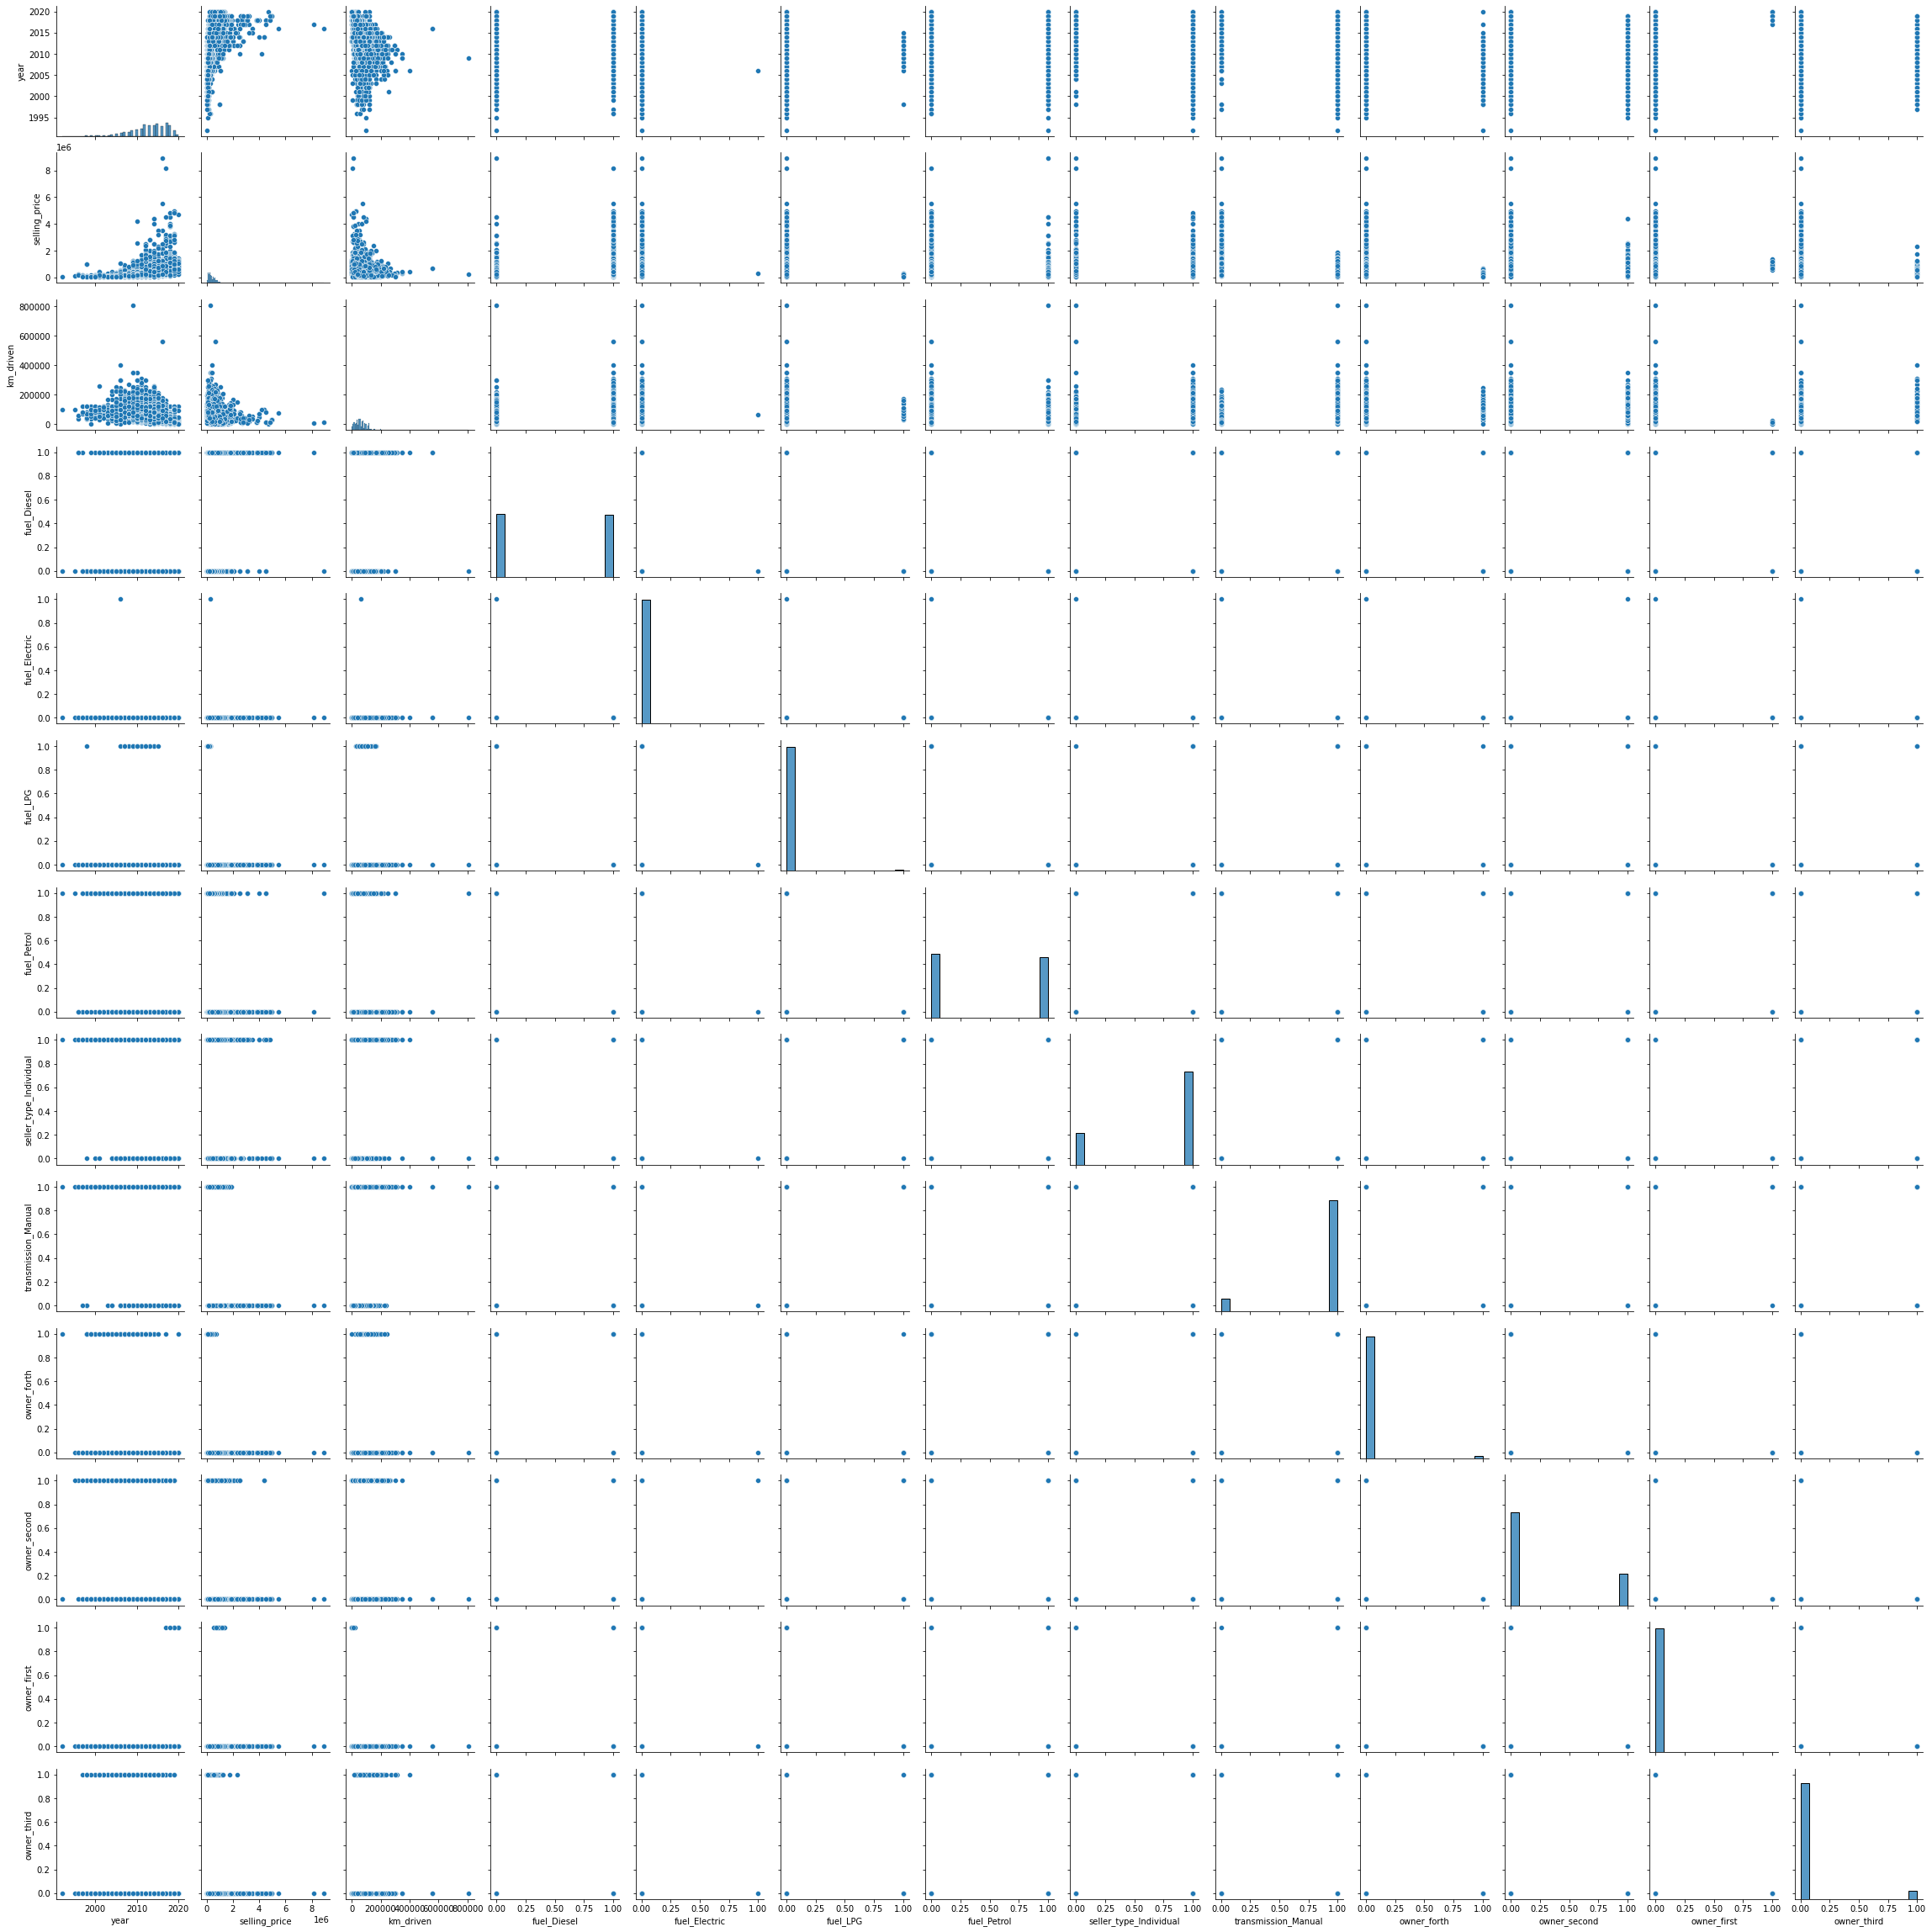

In [25]:
sns.pairplot(final_dataset)

<AxesSubplot:>

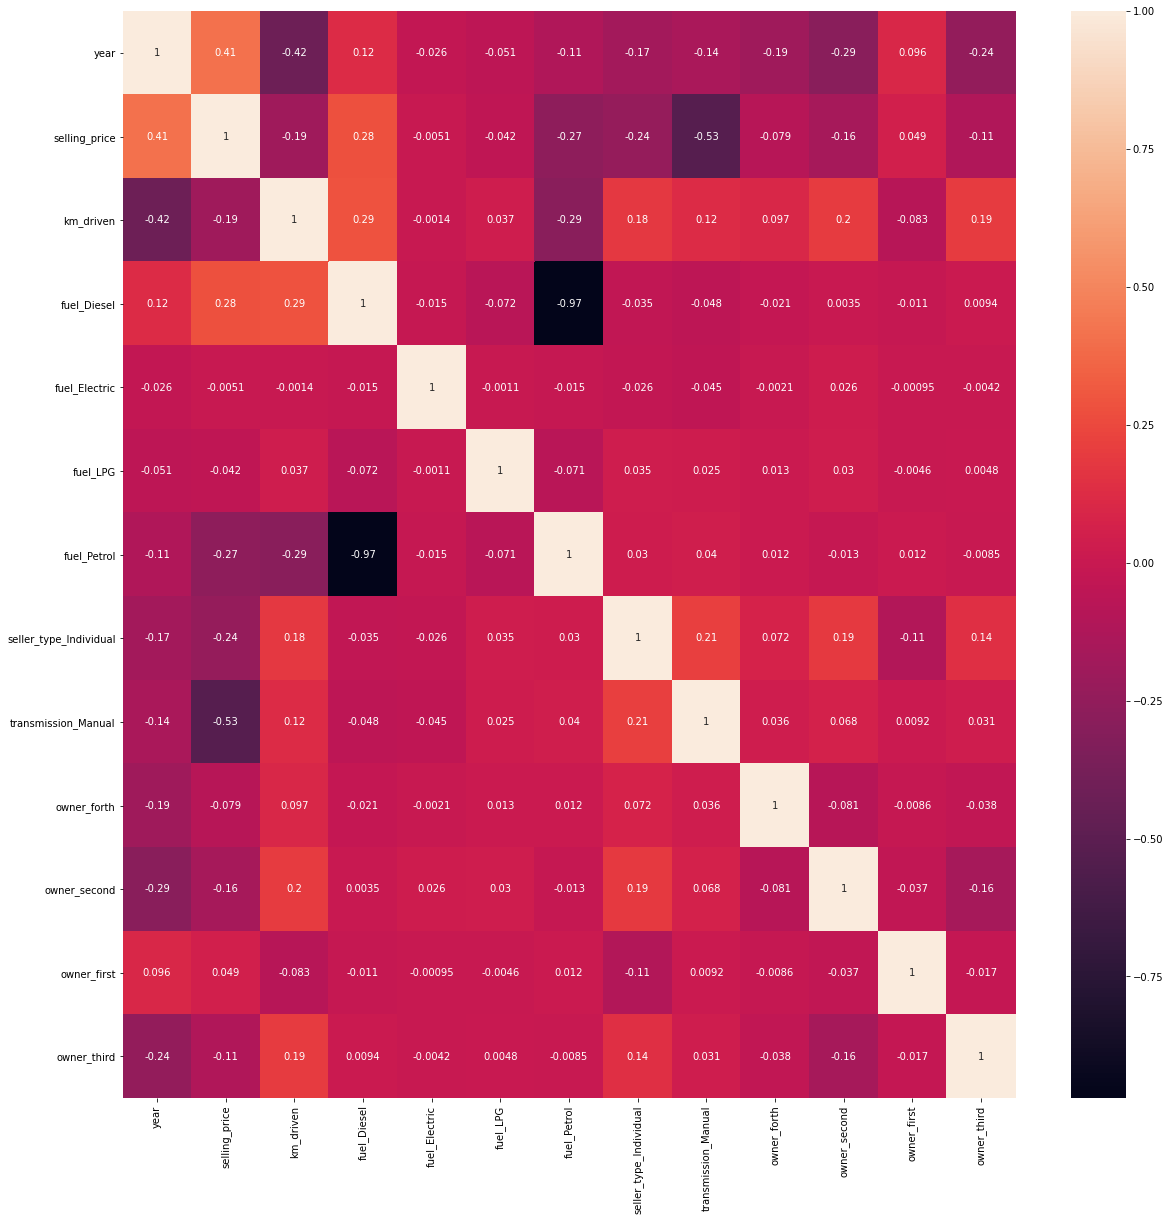

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset.corr(),annot=True)

In [28]:
X=final_dataset[['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
        'transmission_Manual', 'owner_forth',
       'owner_second', 'owner_first', 'owner_third']]
y=final_dataset['selling_price']

In [29]:
X.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_forth,owner_second,owner_first,owner_third
0,2007,70000,0,0,0,1,1,1,0,0,0,0
1,2007,50000,0,0,0,1,1,1,0,0,0,0
2,2012,100000,1,0,0,0,1,1,0,0,0,0
3,2017,46000,0,0,0,1,1,1,0,0,0,0
4,2014,141000,1,0,0,0,1,1,0,1,0,0


In [30]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
model.feature_importances_

array([2.50527433e-01, 2.51015232e-01, 1.29253277e-01, 3.65515737e-05,
       2.56005485e-05, 2.22010515e-04, 4.85805645e-02, 2.92829002e-01,
       7.43594278e-04, 2.16153382e-02, 4.79691787e-04, 4.67170407e-03])

<AxesSubplot:>

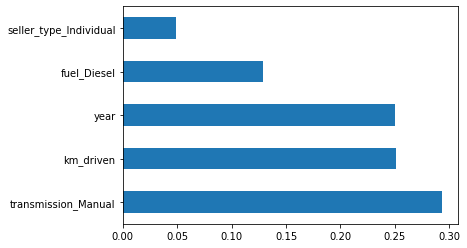

In [33]:
f_impo=pd.Series(model.feature_importances_,index=X.columns)
f_impo.nlargest(5).plot(kind='barh')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_split=train_test_split(X,y,test_size=0.2)

In [35]:
X_train

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_forth,owner_second,owner_first,owner_third
2182,2017,20000,0,0,0,1,0,0,0,1,0,0
1049,2017,28838,0,0,0,1,1,1,0,0,0,0
280,2013,120000,1,0,0,0,1,1,0,0,0,0
1712,2017,25000,0,0,0,1,1,1,0,0,0,0
428,2015,30000,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
351,2014,72000,0,0,0,0,0,1,0,0,0,0
2791,2019,13900,0,0,0,1,1,1,0,0,0,0
446,2006,124439,0,0,0,1,1,1,0,1,0,0
2502,2009,25000,0,0,0,1,1,1,0,0,0,0


In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [37]:
#### let we check for hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [40]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
rf = RandomForestRegressor()

In [42]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [45]:
predictions=rf_random.predict(X_test)

In [46]:
predictions

array([ 328267.34401761,  679586.2395819 ,  356340.94656881,
        216903.69990129,  233221.31594356,  122564.8641129 ,
        463039.26375475,  570435.13347175,  802773.86443793,
        205963.18286669,   89679.69397019,  280788.94083811,
        108510.96239476, 1625398.6664455 ,  988552.39338729,
        461565.54377322, 1312655.42371153,  411564.74653098,
        567102.75464   ,  503273.69904295,  318463.49056414,
        190668.00650831,  231090.16311231, 1083918.38794769,
        190152.3112261 ,  420687.72766358,  320541.59518634,
        454681.70526303,  733040.79414934,  321979.68933811,
        322024.80266334,  448562.50062459,  409336.78691472,
        467825.40271741,  434055.45439076,  808008.08027597,
        429631.06437405,  225482.41930892,  355540.20475588,
        762377.80868387,  581099.70469374,  261469.98331888,
       1312655.42371153,  994015.79021709,  437472.34454283,
        191819.26490125,  657896.99447759, 1944034.30345118,
        385278.77426626,

c:\users\samyak\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

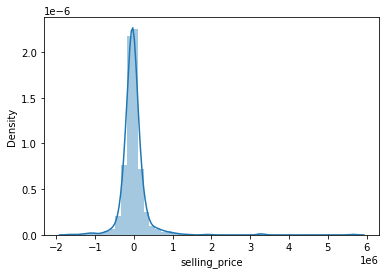

In [47]:
sns.distplot(y_split-predictions)

c:\users\samyak\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

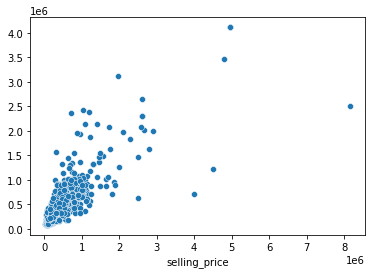

In [48]:
sns.scatterplot(y_split,predictions)

In [49]:
import pickle

In [51]:
file=open('random_forest.pkl','wb')
pickle.dump(rf_random,file)